### 주가의 통계적 특성을 분석한다

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#### 주가 데이터를 읽어온다

In [2]:
  #불필요한 NAN data 값 있으면 제거하라.
p = pd.read_csv('./stockData/005930.csv', index_col=0, parse_dates=True) #첫번째 열, data들 파싱해와
p = p.sort_index() 
p = p.dropna()

In [3]:
print(p.head())
print(p.tail())  #open: 시가   high: 고가   low: 저가   close: 종가   volume: 거래량

             open   high    low  close  volume
date                                          
2011-05-12  17720  18020  17660  17700  552942
2011-05-13  17920  18480  17800  18320  669154
2011-05-16  18340  18380  17960  18020  322905
2011-05-17  17940  17960  17780  17800  231293
2011-05-18  17860  17980  17720  17860  331824
             open   high    low  close    volume
date                                            
2019-06-19  45450  45450  45000  45350  10417690
2019-06-20  44850  45500  44850  45500   7147785
2019-06-21  45750  45800  45200  45700   9454913
2019-06-24  45200  45800  45200  45500   6085066
2019-06-25  45200  45800  45200  45450   4120726


#### 종가와 이동평균 차트를 그린다.

C:\Anaconda3.7\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


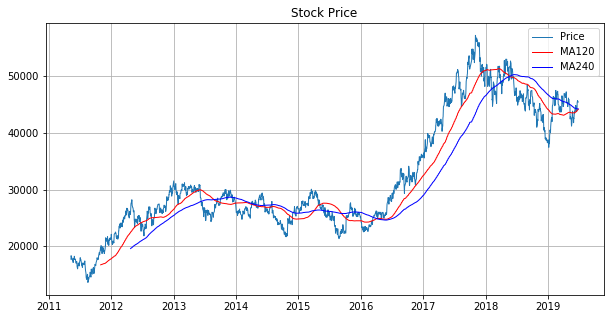

In [4]:
p['sma120'] = p['close'].rolling(window=120).mean()      # window=120: 120일 이동평균  rolloing: 데이터 아래로 sliding    mean: 평균
p['sma240'] = p['close'].rolling(window=240).mean()      # 240일 이동평균

plt.figure(1, figsize=(10, 5))
plt.plot(p['close'], linewidth=1,label="Price")
plt.plot(p['sma120'], linewidth=1, color='red', label="MA120")
plt.plot(p['sma240'], linewidth=1, color='blue', label="MA240")
plt.title("Stock Price")
plt.grid() # 그래프 안 선
plt.legend() # 범례
plt.show()

#금융공학에서 얘는 사실 분석대상이 아님. 정보량 적음. 아래에 수익률을 쓰지. 얘는 시간이 지남에 따라 평균이 변화하는 특징을 갖는 데이터 : non stationary data
#rolling 하면 수익률 분석이 다르게 나온다. dropna해야 다시 구할 수 있음.

In [5]:
pd.DataFrame(p) #과거의 120/240 일 씩 데이터로 이동평균

,open,high,low,close,volume,sma120,sma240
date,,,,,,,
2011-05-12,17720,18020,17660,17700,552942,NaN,NaN
2011-05-13,17920,18480,17800,18320,669154,NaN,NaN
2011-05-16,18340,18380,17960,18020,322905,NaN,NaN
2011-05-17,17940,17960,17780,17800,231293,NaN,NaN
2011-05-18,17860,17980,17720,17860,331824,NaN,NaN
2011-05-19,17820,17960,17600,17600,387733,NaN,NaN
2011-05-20,17700,17740,17600,17640,221517,NaN,NaN
2011-05-23,17540,17700,17440,17460,282045,NaN,NaN
2011-05-24,17440,17680,17300,17300,290181,NaN,NaN


#### 종가를 기준으로 일일 수익률을 계산한다.

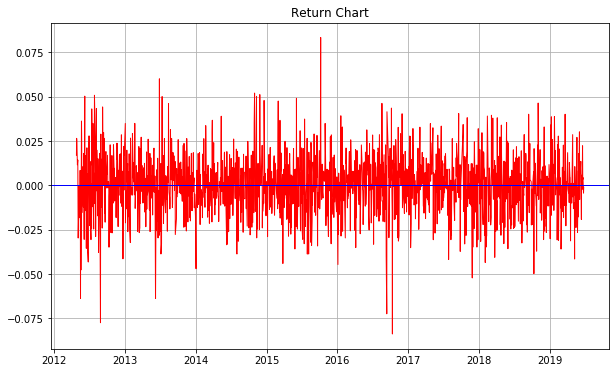

In [6]:
#수익률 : return
p['rtn'] = np.log(p['close']) - np.log(p['close'].shift(1))    # np.log(p['close'] : 현재 종가 shift(1) : 이전 종가 -->연속 수익률
p = p.dropna()  #위에 FRAME에서 보이는 naN값 제거 (nanlow)

# 수익률 차트를 그린다
plt.figure(figsize=(10,6))
plt.plot(p['rtn'], color='red', linewidth=1) # 빨간애
plt.axhline(y=0, color='blue', linewidth=1)  # 파란애
plt.title("Return Chart")
plt.grid()
plt.show()

#위아래 분산을 봐도 대체적으로 균일한 형태의 데이터 : stationary data   금융공학에서는 수익률에 중점을 더 많이 두게 된다.

#### 수익률 분포를 그려본다

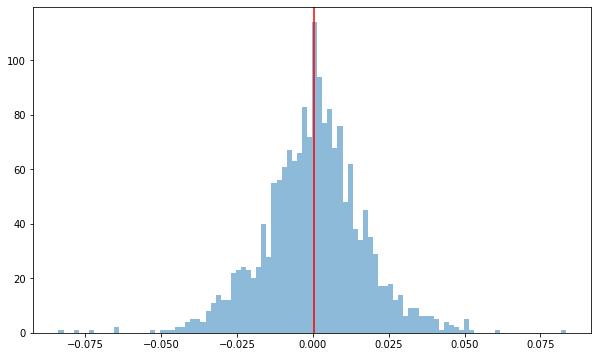

In [9]:
#frequency
plt.figure(figsize=(10,6))
n, bins, patched = plt.hist(p['rtn'], bins=100, alpha=0.5) #histogram그래프, bins는 x축, alpha는 투명도
plt.axvline(p['rtn'].mean(), color='red')
plt.show()

각 구간의 빈도를 확인하려면 아래를 수행한다.

In [89]:
#삼성전자의 일일 수익률 = Bin값이 작을 수록 frequency가 높아진다. bin값이 높을 수록 frequency가 낮아진다.-> 그래프 모양에 그대로 반영

for index in range(len(n)):
    if (n[index] > 30):
        # 너무 많으므로 빈도가 30개 이상만 표시한다
        print("Bin : %.4f, Frequency = %d" % (bins[index], n[index]))

Bin : -0.0169, Frequency = 40
Bin : -0.0136, Frequency = 55
Bin : -0.0119, Frequency = 56
Bin : -0.0103, Frequency = 61
Bin : -0.0086, Frequency = 67
Bin : -0.0069, Frequency = 63
Bin : -0.0052, Frequency = 66
Bin : -0.0036, Frequency = 83
Bin : -0.0019, Frequency = 72
Bin : -0.0002, Frequency = 114
Bin : 0.0014, Frequency = 94
Bin : 0.0031, Frequency = 77
Bin : 0.0048, Frequency = 82
Bin : 0.0065, Frequency = 68
Bin : 0.0081, Frequency = 76
Bin : 0.0098, Frequency = 48
Bin : 0.0115, Frequency = 62
Bin : 0.0131, Frequency = 38
Bin : 0.0148, Frequency = 34
Bin : 0.0165, Frequency = 45
Bin : 0.0182, Frequency = 35


In [90]:
p=p.dropna()
np.sqrt(p['rtn'].std()) #sqrt는 루트 씌워주기 std는 표준편차

0.12842985182540817

In [91]:
np.sqrt(252)*(p['rtn'].std())

#삼성전자 연간 변동률

0.26183773371991437

## LG전자

In [51]:
l = pd.read_csv('./stockData/066570.csv', index_col=0, parse_dates=True)
l = p.sort_index() 
l = p.dropna()

In [52]:
print(l.head())
print(l.tail())

             open   high    low  close  volume        sma120        sma240  \
date                                                                         
2012-04-25  26080  26300  25860  26100  276830  22444.166667  19577.583333   
2012-04-26  26400  26800  26340  26800  330125  22506.333333  19615.500000   
2012-04-27  27100  27660  27020  27480  318334  22567.833333  19653.666667   
2012-04-30  27900  28180  27540  27800  315924  22634.000000  19694.416667   
2012-05-02  28200  28360  27980  28200  368585  22707.333333  19737.750000   

                 rtn  
date                  
2012-04-25  0.017002  
2012-04-26  0.026467  
2012-04-27  0.025057  
2012-04-30  0.011578  
2012-05-02  0.014286  
             open   high    low  close    volume        sma120        sma240  \
date                                                                           
2019-06-19  45450  45450  45000  45350  10417690  43940.416667  44255.833333   
2019-06-20  44850  45500  44850  45500   7147785  43

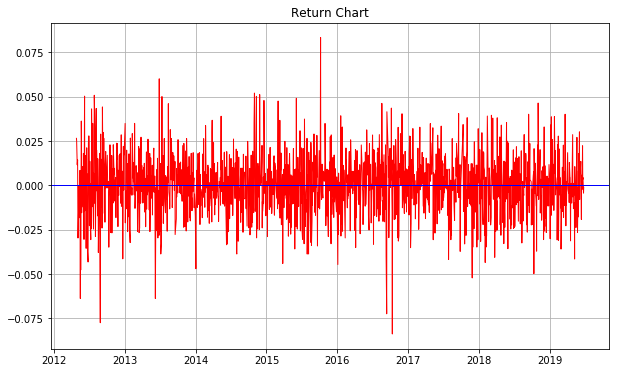

In [53]:
l['rtn'] =np.log(l['close']) - np.log(l['close'].shift(1))
l = l.dropna()

plt.figure(figsize=(10,6))
plt.plot(l['rtn'], color='red', linewidth=1)
plt.axhline(y=0, color='blue', linewidth=1)  #가로선
plt.title("Return Chart")
plt.grid()
plt.show()

In [54]:
np.sqrt(252)*(l['rtn'].std())

0.26183602892785207

## KT

In [55]:
k = pd.read_csv('./stockData/030200.csv', index_col=0, parse_dates=True)
k = k.sort_index() 
k = k.dropna()

In [56]:
print(k.head())
print(k.tail())

             open   high    low  close   volume
date                                           
2011-05-12  39150  39150  38600  38700   766609
2011-05-13  38700  39350  38600  39050   772642
2011-05-16  38850  39100  38350  38650  1028290
2011-05-17  38650  38950  38300  38350   699914
2011-05-18  38300  38500  38050  38200   669576
             open   high    low  close  volume
date                                          
2019-06-19  28600  28700  28450  28500  359243
2019-06-20  28600  28600  28300  28400  505181
2019-06-21  28350  28550  28200  28200  507850
2019-06-24  28350  28600  28250  28350  398871
2019-06-25  28400  28500  28250  28250  194735


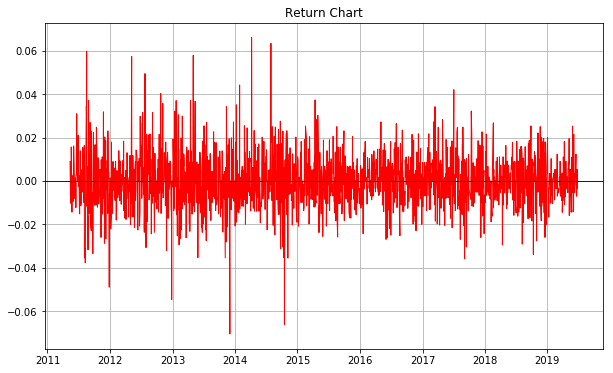

In [57]:
k['rtn'] =np.log(k['close']) - np.log(k['close'].shift(1))
k = k.dropna()

plt.figure(figsize=(10,6))
plt.plot(k['rtn'], color='red', linewidth=1)
plt.axhline(y=0, color='blue', linewidth=1)
plt.title("Return Chart")
plt.grid()
plt.show()

In [40]:
np.sqrt(252)*(k['rtn'].std())

0.1924949774629038

 수익률의 표준편차를 위험도로 측정-> 분야별로 다름 KT는 낮게나왔다. 수익률에 변덕이 적었다는 뜻

 현대 금융시장에서 변동성이 차지하는 역할은 대단히 크다. 그리고 변동성을 표현하는 방법도 매우 다양하다. 
 일반적으로 변동성은 과거 일정 기간 동안 주가의 수익률에 대한 표준편차로 나타낸다. 즉, 일정 기간 동안 수익률의 분포가 평균으로부터 얼마나 떨어져 있는가를 계량화한 것이다. 평균 수익률로부터 많이 떨어져 있으면 변동성이 높은 것이고, 조금 떨어져 있으면 변동성이 낮은 것이다.  
 일반적으로 변동성은 과거 일정 기간 (T) 동안의 평균 변동성을 의미한다 (T를 얼마로 설정하느냐에 따라 평균 변동성은 다르게 측정된다). 1952년 마코비츠 이래로 평균 변동성은 식 (1)과 같이 주가의 수익률 분산으로 측정해왔다. 이 식을 1 ~ T 기간까지의 순간 변동성들을 평균한 것으로 생각해 볼 수도 있다. 그런데 순간 변동성처럼 보이는 항에 평균의 (x bar) 개념이 들어가 있다. 따라서 이 항을 순간 변동성이라고 보기는 어려울 것 같다.  
 주가 수익률의 시계열은 평균이 (거의) 0 이므로 x bar를 0 으로 근사시켜 생각할 수도 있다. 그러면 순간 분산은 t 시점의 수익률 제곱이 되고, 순간 변동성은 단순히 그날의 수익률이 되어 변동성이라는 개념이 없어진다. 따라서 이 식으로 순간 변동성을 이해하기는 어려울 것 같다.  
  
 순간 변동성 혹은 현재의 변동성은 얼마인가? 오늘의 변동성은 단순히 오늘의 수익률인가? 내일의 변동성은 얼마로 예측되는가? 처럼 순간 변동성이라는 개념을 직관적으로 이해하기는 쉽지 않다. 그 이유는 분산의 개념으로 변동성을 생각하기 때문이다.  
 VKOSPI는 옵션의 시장가를 이용하여 KOSPI200 지수의 향후 30일 간의 평균 변동성을 예측한 지수이다. 향후 특정 시점의 순간 변동성은 잘 모르지만, 앞으로 30일 동안의 순간 변동성들을 모두 평균한 것이 바로 VKOSPI 지수의 의미이다. VKOSPI 유도식을 이용하면 순간 변동성에 대한 표현을 얻을 수 있다.   
 식 (2)는 VIX 공식 유도과정의 식 (9)이다. 이 식의 좌변은 순간 변동성들을 모두 평균한 평균 변동성을 의미한다. 이 식을 이산식으로 표현하면 식 (3)과 같이 쓸 수 있다. 여기서 0 ~ T 기간 동안의 최종 로그 수익률은 중간의 로그 수익률 (0, 1, 2, 3, … T)을 모두 합한 것과 동일하므로 식 (2)의 최종 로그 수익률은 식 (3)의 로그 수익률들의 합으로 쓸 수 있다. 식 (3)을 정리하면 식 (4)로 쓸 수 있고, 이 식이 바로 순간 변동성을 일정 기간 (1 ~ T) 평균한 평균 변동성이 된다.  
   
식 (4)의 대괄호 안의 표현을 순간 변동성으로 정의할 수 있다. 왜냐하면, 현재시점 (t)과 이전 시점 (t-1) 만으로 변동성 (분산)을 표현하고 있기 때문이다 (식 (1) 처럼 x bar 와 같은 표현이 없다. 일정 기간이라는 개념도 없다).   
 즉, 오늘의 변동성 (분산)은 오늘의 이산 수익률과 로그 수익률 (연속 수익률)의 차이에 2를 곱한 것과 같다. 변동성이 크다는 것은 이산 수익률과 로그 수익률의 차이가 크다는 것을 의미하고, 변동성이 작다는 것은 두 수익률의 차이가 작다는 것을 의미한다.  
 식 (4)를 이용하면 순간 변동성을 직관적으로 이해해 볼 수 있다. 아래 그림은 주가가 동일한 크기로 한번 오르고, 한번 떨어진 경우의 최종 pay-off의 변화이다. t=0 시점에 100원짜리 주식이, t=1 시점에 +10% 상승하고, t=2 시점에 -10% 하락하면 최종 주가는 99원이 된다 (이산 수익률 기준). 반대의 경우로 t=1 시점에 -10% 하락하고, t=2 시점에 +10% 상승해도 결과는 동일하다. 변동성이 증가해서 +20 ~ -20% 로 변하는 경우와, +30% ~ -30%로 변하는 경우를 관찰해 보면 이산 수익률과 로그 수익률의 격차는 점점 커지고 최종 주가는 더 크게 영향을 받는다 (그림에 로그 수익률은 표시되어 있지 않음).  
  
 아래 그림은 최근 1년간 KOSPI200 지수의 역사적 변동성을 계산해 본 것이다. 평균 변동성 (1)은 식 (1)로 계산한 것이고, 평균 변동성 (2)는 식 (4)로 계산한 것으로, 결과가 거의 동일하다. 즉, 식 (4)도 변동성에 대한 표현이 된다는 것을 알 수 있고, 분산이 아닌 방법으로도 변동성을 표현할 수 있다는 것을 알 수 있다. (상세 계산식은 첨부 파일 참조)   
  
식 (4)가 가지는 의미를 요약해 보면, 순간 변동성을 표현할 수 있다는 점과, 변동성은 이산 수익률과 로그 수익률의 차이와 관계가 있다는 점, 그리고 분산이 아닌 다른 관점으로도 변동성을 측정할 수 있다는 점이다.

#### 수익률의 박스 플롯을 관찰한다

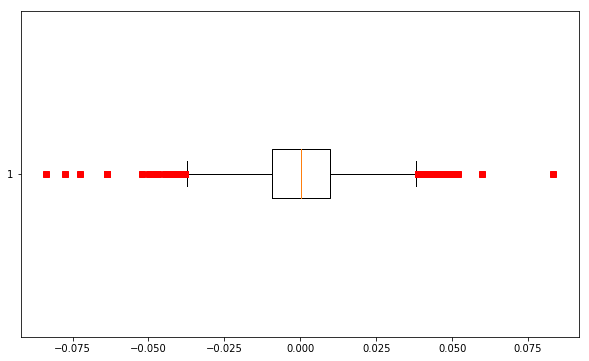

In [9]:
plt.figure(figsize=(10,6))
plt.boxplot(p['rtn'], 0, 'rs', 0)
plt.show()

#### 일일 수익률의 연 평균 수익률과 변동성을 측정한다

In [10]:
drift = p['rtn'].mean() * 252
volatility = p['rtn'].std() * np.sqrt(252)

print("Drift = %.2f (%s), Volatility = %.2f (%s)" % (drift * 100, '%', volatility * 100, '%'))

Drift = 8.18 (%), Volatility = 26.18 (%)


#### 일일 수익률의 기술 통계량을 계산한다

In [11]:
print(p['rtn'].describe())

count    1761.000000
mean        0.000325
std         0.016494
min        -0.083770
25%        -0.009248
50%         0.000390
75%         0.009727
max         0.083312
Name: rtn, dtype: float64


위험률: 수익률의 표준편차를 통해 알아보기

In [ ]:
numpy.std(arr)